In [21]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Configurações iniciais
base_path = "archive"
classes = ['cats_set', 'dogs_set']
destiny_path = "dataset_processado"
test_size = 0.1
val_size = 0.2
random_seed = 42

print("\n[1/4] Carregando metadados...")
data = []
for label in classes:
    class_path = os.path.join(base_path, label)
    for img_name in os.listdir(class_path):
        data.append({
            "filename": img_name,
            "label": label.replace('_set', ''),
            "filepath": os.path.join(class_path, img_name)
        })

df = pd.DataFrame(data)


[1/4] Carregando metadados...


In [22]:
# Análise básica
print("\n[2/4] Análise exploratória:")
print("="*40)
print(df.head())
print("\nInformações do dataset:")
print(df.info())
print("\nDistribuição de classes:")
print(df['label'].value_counts())
print("\nValores faltantes:")
print(df.isnull().sum())
print("\nDuplicatas:", df.duplicated().sum())
print("="*40)


[2/4] Análise exploratória:
       filename label                       filepath
0  cat.4369.jpg  cats  archive/cats_set/cat.4369.jpg
1  cat.4355.jpg  cats  archive/cats_set/cat.4355.jpg
2  cat.4433.jpg  cats  archive/cats_set/cat.4433.jpg
3  cat.4427.jpg  cats  archive/cats_set/cat.4427.jpg
4  cat.4341.jpg  cats  archive/cats_set/cat.4341.jpg

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1000 non-null   object
 1   label     1000 non-null   object
 2   filepath  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB
None

Distribuição de classes:
label
cats    500
dogs    500
Name: count, dtype: int64

Valores faltantes:
filename    0
label       0
filepath    0
dtype: int64

Duplicatas: 0



Amostra de imagens:


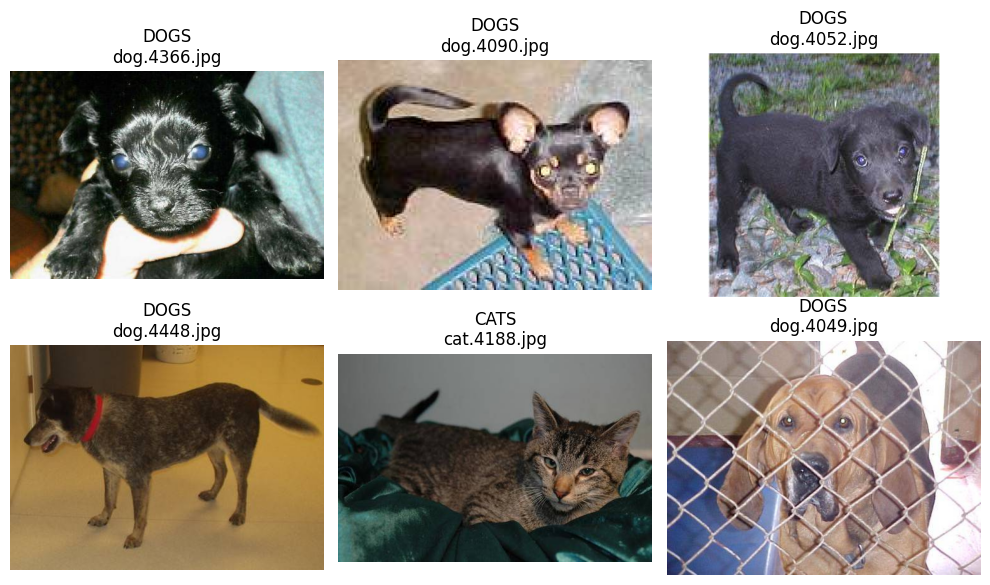

In [23]:
# Visualização de imagens
print("\nAmostra de imagens:")
plt.figure(figsize=(10, 6))
sample = df.sample(6, random_state=random_seed)

for i, (_, row) in enumerate(sample.iterrows(), 1):
    plt.subplot(2, 3, i)
    img = Image.open(row['filepath'])
    plt.imshow(img)
    plt.title(f"{row['label'].upper()}\n{row['filename']}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [24]:

# ====================
# 2. PREPARAÇÃO DOS DIRETÓRIOS
# ====================
print("\n[3/4] Preparando estrutura de diretórios...")

# Criar pastas de destino
for split in ['Training', 'Validation', 'Testing']:
    for cls in classes:
        os.makedirs(
            os.path.join(destiny_path, split, cls),
            exist_ok=True
        )


[3/4] Preparando estrutura de diretórios...


In [25]:

# ====================
# 3. DIVISÃO DOS DADOS
# ====================
print("\n[4/4] Dividindo os dados...")

def split_and_copy(class_name):
    # Carregar arquivos da classe
    class_files = df[df['label'] == class_name.replace('_set', '')]['filename'].tolist()
    class_path = os.path.join(base_path, class_name)
    
    # Divisão estratificada
    train_val, test = train_test_split(
        class_files,
        test_size=test_size,
        random_state=random_seed
    )
    
    train, val = train_test_split(
        train_val,
        test_size=val_size/(1-test_size),
        random_state=random_seed
    )
    
    # Função para copiar arquivos
    def copy_files(files, split):
        for f in files:
            src = os.path.join(class_path, f)
            dst = os.path.join(destiny_path, split, class_name, f)
            shutil.copy(src, dst)
    
    # Executar cópias
    copy_files(train, 'Training')
    copy_files(val, 'Validation')
    copy_files(test, 'Testing')

# Processar ambas as classes
for cls in classes:
    split_and_copy(cls)




[4/4] Dividindo os dados...


In [26]:
# ====================
# 4. VERIFICAÇÃO FINAL
# ====================
print("\n[+] Distribuição final:")
def print_distribution(split_name):
    path = os.path.join(destiny_path, split_name)
    cats = len(os.listdir(os.path.join(path, 'cats_set')))
    dogs = len(os.listdir(os.path.join(path, 'dogs_set')))
    print(f"{split_name}:")
    print(f"  Gatos: {cats} ({cats/(cats+dogs):.1%})")
    print(f"  Cachorros: {dogs} ({dogs/(cats+dogs):.1%})")
    print(f"  Total: {cats + dogs}\n")

print_distribution('Training')
print_distribution('Validation')
print_distribution('Testing')

print(f"\n[!] Processo concluído! Dataset pronto em: {destiny_path}")


[+] Distribuição final:
Training:
  Gatos: 350 (50.0%)
  Cachorros: 350 (50.0%)
  Total: 700

Validation:
  Gatos: 100 (50.0%)
  Cachorros: 100 (50.0%)
  Total: 200

Testing:
  Gatos: 50 (50.0%)
  Cachorros: 50 (50.0%)
  Total: 100


[!] Processo concluído! Dataset pronto em: dataset_processado
